#  목차
**3.데이터 소개**
- 3-1 변수 설명

- 3-2 데이터 분석 내용

**4.데이터 불러오기**
- 4-1 분석에 필요한 패키지 불러오기

- 4-2 데이터 불러오기

**5.데이터 검토 및 결측치 확인**
- 5-1 결측치 확인

- 5-2 데이터 검토

**6.데이터 전처리**
- 6-1 변수명 변환

- 6-2 결측치 변환 및 행 제거

- 6-3 비교 분석을 위해 새로운 컬럼 생성

- 6-4 데이터 type 변환

**7.one-hot encoding**

**8.데이터 분석 & EDA**
- 8-1 넷플릭스에 프로그램이 추가되는 달 분석

- 8-2 type 컬럼의 tv show와 movie 타입 비율 분석

- 8-3 영화, 티비 쇼 타입의 연령대별 시청 수 분석

- 8-4 컨텐츠 추가 연도 분석

- 8-5 영화 프로그램 상영 시간 분석

- 8-6 장르와 프로그램 길이 분석

- 8-7 국가별 프로그램 길이 분석

- 8-8 국가별 인기 장르 분석

- 8-9 넷플릭스 제작 국가 분석

- 8-10 director 분석

- 8-11 개봉 연도와 프로그램 길이의 상관관계

**9. 결론 및 인사이트**

# 데이터 소개
- 넷플릭스 데이터 데이터 분석
- 출처 : https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization/data

## 변수 설명
- show_id : 프로그램 고유 id

- type : 프로그램의 카테고리 (tv show와 movie 타입으로 나눠짐)

- title : 프로그램 이름

- director : 감독 이름

- country : 제작국가

- date_added : 프로그램이 넷플릭스에 추가된 날짜

- release_year : 프로그램의 개봉일

- rating : 연령대별 프로그램 등급

- duration : 프로그램 길이

- listed_in : 프로그램의 장르

## 데이터 분석 내용
- 넷플릭스에 프로그램이 추가되는 달 분석

- type 컬럼의 tv show와 movie 타입 비율 분석

- 영화, 티비 쇼 타입의 연령대별 시청 수 분석

- 텐츠 추가 연도 분석

- 영화 프로그램 상영 시간 분석

- 장르와 프로그램 길이 분석

- 국가별 프로그램 길이 분석

- 국가별 인기 장르 분석

- 넷플릭스 제작 국가 분석

- director 분석

- 개봉 연도와 프로그램 길이의 상관관계

# 데이터 불러오기

## 분석에 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm


## 데이터 불러오기

In [2]:
nfx=pd.read_csv('netflix1.csv') #nfx로 데이터프레임 저장
nfx

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States   9/25/2021          2020  PG-13     90 min   
1            France   9/24/2021          2021  TV-MA   1 Season   
2     United States   9/24/2021          2021  TV-MA   1 Season   
3            Brazil   9/22/2021          2021  TV-PG     91 min   
4     United States   9/24/2021          1993  TV-MA    125 min   
...             ...         ...           ...    ...        ...   
8785         Turkey   1/17/2017          2016  TV-PG  2 Seasons   
8786  United States   9/13/2018          2016  TV-Y7  3 Seasons   
8787       Pakistan  12/15/2016          2012  TV-PG   1 Season   
8788       Pakistan   6/23/2018          2016   TV-Y   1 Season   
8789       Pakistan    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
0                                         Documentaries  
1     Crime TV Shows, International TV Shows, TV Act...  
2                    TV Dramas, TV Horror, TV Mysteries  
3                    Children & Family Movies, Comedies  
4      Dramas, Independent Movies, International Movies  
...                                                 ...  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ...  
8788                                           Kids' TV  
8789                                           Kids' TV  

[8790 rows x 10 columns]

# 데이터 검토 및 결측치 확인

## 결측치 확인

In [3]:
nfx.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## 데이터 검토

In [4]:
nfx.info()
#release_year 컬럼을 제외하고 모두 문자형인 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
nfx.describe() 

release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [6]:
nfx['director'].value_counts() #감독 컬럼의 빈도 수 파악

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [7]:
nfx['country'].value_counts() #나라별 시청 빈도 확인

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [8]:
nfx['rating'].value_counts() #연령별 등급 확안

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

**rating 컬럼 설명**

티비 쇼 권장 시청자 연령 그룹(빈도 수 순서로 설명)

TV-MA(성인 시청자 전용): 성인 시청자를 대상으로 하며 17세 미만의 어린이에게는 적합하지 않습니다. 콘텐츠에는 강렬한 폭력, 폭력적인 언어, 성적인 콘텐츠 또는 기타 성인용 주제가 포함될 수 있습니다.

TV-14(부모님 강력 주의): 일부 자료는 14세 미만의 어린이에게 적합하지 않을 수 있습니다. 콘텐츠에는 강렬한 폭력, 성적인 내용, 저속한 유머 또는 거친 언어가 포함될 수 있으므로 부모는 주의를 기울여야 합니다.

TV-PG(부모 지도 권장): 일부 자료는 어린이에게 적합하지 않을 수 있습니다. 콘텐츠에 가벼운 폭력, 암시적인 대화 또는 거친 언어가 포함될 수 있으므로 부모는 "부모의 지도"를 제공하는 것이 좋습니다.

R(제한): 17세 이상 시청가 또는 부모 또는 성인 보호자가 동반한 시청자로 제한됩니다. 콘텐츠에는 거친 언어, 격렬한 폭력, 과도한 노출, 약물 사용 또는 기타 성인용 주제가 포함될 수 있습니다. 이 등급은 일반적으로 TV 프로그램보다는 영화에 사용됩니다.

PG-13(부모님 강력 주의): 일부 자료는 13세 미만 어린이에게 부적절할 수 있습니다. 해당 콘텐츠에는 폭력, 짧은 노출, 온화한 언어가 포함될 수 있으므로 부모는 주의하시기 바랍니다. 이 등급은 일반적으로 TV 프로그램보다는 영화에 사용됩니다.

TV-Y7(고학년 어린이 대상): 7세 이상의 어린이를 대상으로 합니다. 콘텐츠는 좀 더 큰 어린이에게 적합하도록 설계되었으며 가벼운 판타지 폭력이나 코미디 요소가 포함될 수 있습니다.

TV-Y(모든 어린이): 모든 어린이에게 적합합니다. 콘텐츠는 모든 연령대의 어린이에게 적합하도록 설계되었으며 불쾌감을 줄 수 있는 내용을 포함하지 않습니다.

PG(부모 지도 권장): 일부 자료는 어린이에게 적합하지 않을 수 있습니다. 콘텐츠에는 어린 시청자가 혼란스럽거나 속상하다고 느낄 수 있는 내용이 포함될 수 있으므로 부모는 '부모의 지도'를 제공할 것을 권장합니다.

TV-G(일반 시청자): 모든 연령층에 적합합니다. 해당 콘텐츠는 어린이를 포함해 모든 사람에게 적합한 것으로 간주됩니다. 여기에는 부모가 부적절하다고 생각할 만한 자료가 포함되어 있지 않습니다.

NR(등급 없음): 콘텐츠에 특정 등급이 할당되지 않았습니다. 이는 독립 영화나 등급을 위해 제출되지 않은 콘텐츠 등 다양한 이유로 발생할 수 있습니다.

G(일반 관객): 모든 연령층에 적합합니다. 해당 콘텐츠는 어린이를 포함해 모든 사람에게 적합한 것으로 간주됩니다. 이 등급은 일반적으로 TV 프로그램보다는 영화에 사용됩니다.

TV-Y7-FV(고학년 대상 - 판타지 폭력): 7세 이상의 어린이를 대상으로 합니다. 콘텐츠에는 TV-Y7 등급 프로그램에 비해 더 강렬하거나 빈번한 판타지 폭력이 포함될 수 있습니다.

NC-17(성인 전용): 17세 이하는 입장할 수 없습니다. 해당 콘텐츠는 어린이나 청소년에게 적합하지 않으며 노골적인 성적 콘텐츠, 장기간의 폭력 또는 기타 극단적인 성인 주제가 포함될 수 있습니다. 이 등급은 일반적으로 TV 프로그램보다는 영화에 사용됩니다.

UR(등급 없음): 콘텐츠에 특정 등급이 할당되지 않았거나 등급이 부여된 영화의 등급이 없는 버전입니다. 시청자는 시청하기 전에 주의를 기울이고 콘텐츠의 성격을 고려해야 합니다.

# 전처리

## 변수명 변환

In [9]:
#rating컬럼을 쉽게 알아보기 위해 target_ages컬럼을 생성

#- ok(older kids)=3개 
#- ad(adults)=5개
#- te(teens)=2개
#- ki(kids)=3개

ratings_ages = {
    'TV-PG': 'Older Kids',  ## ok
    'TV-MA': 'Adults',  ## ad
    'TV-Y7-FV': 'Older Kids',  ##ok
    'TV-Y7': 'Older Kids', ##ok
    'TV-14': 'Teens', ## te
    'R': 'Adults', ## ad
    'TV-Y': 'Kids', ##ki
    'NR': 'Adults', ##ad  ##NR(등급 없음): 콘텐츠에 특정 등급이 할당되지 않았습니다. 이는 독립 영화나 등급을 위해 제출되지 않은 콘텐츠 등 다양한 이유로 발생할 수 있습니다.
    'PG-13': 'Teens', ##te
    'TV-G': 'Kids', ##ki
    'PG': 'Older Kids', ##ok
    'G': 'Kids', ##ki
    'UR': 'Adults', ##ad 
#UR(등급 없음): 콘텐츠에 특정 등급이 할당되지 않았거나 등급이 부여된 영화의 등급이 없는 버전입니다. 시청자는 시청하기 전에 주의를 기울이고 콘텐츠의 성격을 고려해야 합니다.
    'NC-17': 'Adults' ## ad
}

nfx['target_ages']=nfx['rating'].replace(ratings_ages)


## 결측치 변환 및 행 제거

In [10]:
# rating 컬름의 UR 값은 특정 등급이 지정되지 않았거나 부여된 영화의 등급이 없는 등급이다. 또한 빈도수를 확인하면 상대적으로 적은 빈도인 3개의 값이 존재하는 것을 확인 가능하다
#따라서 데이터 분석에 큰 요인이 되지않는 UR 등급이 존재하는 행은 삭제한다.
nfx['rating']=np.where(nfx['rating']=='UR',np.nan,nfx['rating']) #UR이 값을 결측치로 변환

nfx.isna().sum()

#ur 값은 삭제된 상태

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          3
duration        0
listed_in       0
target_ages     0
dtype: int64

In [11]:
nfx=nfx.dropna() #결측치로 변환한 값 제거해주기
nfx.isna().sum() #ur값이 사라진 것을 확인 가능

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
target_ages     0
dtype: int64

## 비교 분석을 위해 새로운 컬럼 생성

In [12]:
## date_added 컬럼을 연도와 달로 분해하기

# year_added 컬럼 추가 하기
nfx['year_added'] = nfx['date_added'].apply(lambda x: x.split("/")[-1])

# month_added 컬럼 추가 하기
nfx['month_added'] = nfx['date_added'].apply(lambda x: x.split("/")[0])

# 추가한 컬럼 데이터 확인
nfx.tail() 
#year_added / month_added / target_ages 컬럼이 새롭게 추가된 것을 확인 가능

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/2728872958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfx['year_added'] = nfx['date_added'].apply(lambda x: x.split("/")[-1])
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/2728872958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfx['month_added'] = nfx['date_added'].apply(lambda x: x.split("/")[0])


show_id     type               title   director        country  \
8785   s8797  TV Show          Yunus Emre  Not Given         Turkey   
8786   s8798  TV Show           Zak Storm  Not Given  United States   
8787   s8801  TV Show  Zindagi Gulzar Hai  Not Given       Pakistan   
8788   s8784  TV Show                Yoko  Not Given       Pakistan   
8789   s8786  TV Show                 YOM  Not Given       Pakistan   

      date_added  release_year rating   duration  \
8785   1/17/2017          2016  TV-PG  2 Seasons   
8786   9/13/2018          2016  TV-Y7  3 Seasons   
8787  12/15/2016          2012  TV-PG   1 Season   
8788   6/23/2018          2016   TV-Y   1 Season   
8789    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in target_ages  \
8785                  International TV Shows, TV Dramas  Older Kids   
8786                                           Kids' TV  Older Kids   
8787  International TV Shows, Romantic TV Shows, TV ...  Older Kids   
8788                                           Kids' TV        Kids   
8789                                           Kids' TV  Older Kids   

     year_added month_added  
8785       2017           1  
8786       2018           9  
8787       2016          12  
8788       2018           6  
8789       2018           6

## 데이터 type 변환

In [13]:
nfx.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
target_ages     object
year_added      object
month_added     object
dtype: object

In [14]:
#비교를 하기 위해 type을 변환
nfx['type']=pd.Categorical(nfx['type']) #type은 카테고리형으로 변환
nfx['year_added']=pd.to_numeric(nfx['year_added']) #날짜 데이터는 정수형으로 변환하기
nfx['month_added']=pd.to_numeric(nfx['month_added']) #날짜 데이터는 정수형으로 변환하기

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/497470474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfx['type']=pd.Categorical(nfx['type']) #type은 카테고리형으로 변환
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/497470474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfx['year_added']=pd.to_numeric(nfx['year_added']) #날짜 데이터는 정수형으로 변환하기
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/497470474.py:4: SettingWithCopyWarning: 
A value is trying to be

In [15]:
nfx.dtypes

show_id           object
type            category
title             object
director          object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
target_ages       object
year_added         int64
month_added        int64
dtype: object

# one-hot encoding

-범주형 데이터인 type 혹은 target_ages를 원핫 인코딩 실시

1)type은 movie와 tv show로 원핫 인코딩이 가능

2)target_ages는 adults / kids / older kids / teens로 원핫 인코딩이 가능

In [16]:
type_dummy=pd.get_dummies(nfx[['type']])
type_dummy.head(10)
target_ages_dummy=pd.get_dummies(nfx[['target_ages']])
target_ages_dummy.head(10)

type_Movie  type_TV Show
0           1             0
1           0             1
2           0             1
3           1             0
4           1             0
5           0             1
6           1             0
7           1             0
8           1             0
9           1             0

In [17]:
target_ages_dummy=pd.get_dummies(nfx[['target_ages']])
target_ages_dummy.head(10)

target_ages_Adults  target_ages_Kids  target_ages_Older Kids  \
0                   0                 0                       0   
1                   1                 0                       0   
2                   1                 0                       0   
3                   0                 0                       1   
4                   1                 0                       0   
5                   0                 0                       0   
6                   0                 0                       0   
7                   0                 0                       1   
8                   1                 0                       0   
9                   0                 0                       1   

   target_ages_Teens  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
5                  1  
6                  1  
7                  0  
8                  0  
9                  0

In [18]:
concat_data=pd.concat([nfx,target_ages_dummy],axis=1)
concat_data #원핫인코딩한 데이터 결과와 nfx기존 데이터 합치기

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States   9/25/2021          2020  PG-13     90 min   
1            France   9/24/2021          2021  TV-MA   1 Season   
2     United States   9/24/2021          2021  TV-MA   1 Season   
3            Brazil   9/22/2021          2021  TV-PG     91 min   
4     United States   9/24/2021          1993  TV-MA    125 min   
...             ...         ...           ...    ...        ...   
8785         Turkey   1/17/2017          2016  TV-PG  2 Seasons   
8786  United States   9/13/2018          2016  TV-Y7  3 Seasons   
8787       Pakistan  12/15/2016          2012  TV-PG   1 Season   
8788       Pakistan   6/23/2018          2016   TV-Y   1 Season   
8789       Pakistan    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in target_ages  \
0                                         Documentaries       Teens   
1     Crime TV Shows, International TV Shows, TV Act...      Adults   
2                    TV Dramas, TV Horror, TV Mysteries      Adults   
3                    Children & Family Movies, Comedies  Older Kids   
4      Dramas, Independent Movies, International Movies      Adults   
...                                                 ...         ...   
8785                  International TV Shows, TV Dramas  Older Kids   
8786                                           Kids' TV  Older Kids   
8787  International TV Shows, Romantic TV Shows, TV ...  Older Kids   
8788                                           Kids' TV        Kids   
8789                                           Kids' TV  Older Kids   

      year_added  month_added  target_ages_Adults  target_ages_Kids  \
0           2021            9                   0                 0   
1           2021            9                   1                 0   
2           2021            9                   1                 0   
3           2021            9                   0                 0   
4           2021            9                   1                 0   
...          ...          ...                 ...               ...   
8785        2017            1                   0                 0   
8786        2018            9                   0                 0   
8787        2016           12                   0                 0   
8788        2018            6                   0                 1   
8789        2018            6                   0                 0   

      target_ages_Older Kids  target_ages_Teens  
0                          0                  1  
1                          0                  0  
2                          0                  0  
3                          1                  0  
4                          0                  0  
...                      ...                ...  
8785                       1                  0  
8786                       1                  0  
8787                       1                  0  
8788                       0                  0  
8789                       1   

# 데이터 분석 & EDA

## 넷플릭스에 프로그램이 추가되는 달 분석

In [19]:
month_data=nfx['month_added'].value_counts()
month_data
#7월이 826개로 첫 번째, 12월이 812개로 두 번째로 높은 순위를 기록한 것을 알 수 있음

7     826
12    812
9     768
4     763
10    760
8     754
3     741
1     737
6     727
11    705
5     632
2     562
Name: month_added, dtype: int64

In [20]:
#mode를 이용해 넷플릭스에 추가되는 달의 최빈값 구하기
nfx['month_added'].mode() 

0    7
Name: month_added, dtype: int64

프로그램이 가장 많이 추가된 달은 7월달로 826개 그 다음은 12월달로 812개가 추가 되었다.

## type 컬럼의 tv show와 movie 타입 비율 분석

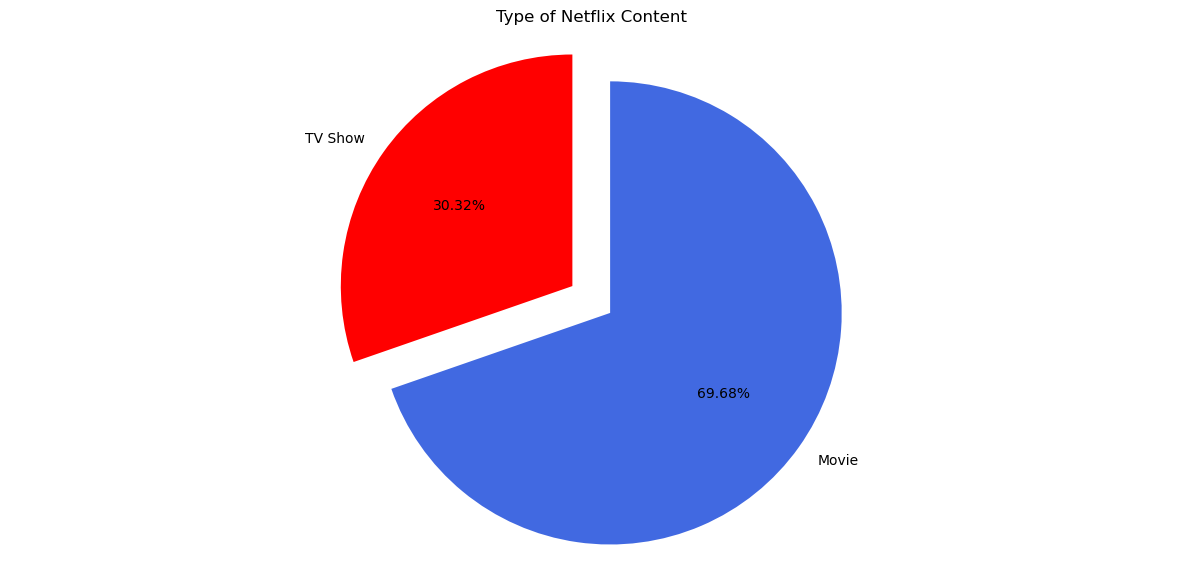

In [21]:
plt.figure(figsize=(15, 7))
labels=['TV Show', 'Movie']
plt.pie(nfx['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['red','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

넷플릭스에 추가된 프로그램은 영화 70%, 티비 쇼 30% 비율이다.


## 영화, 티비 쇼 타입의 연령대별 등급 분포 분석

In [22]:
df_tv = nfx[nfx["type"] == "TV Show"]
df_movies = nfx[nfx["type"] == "Movie"]

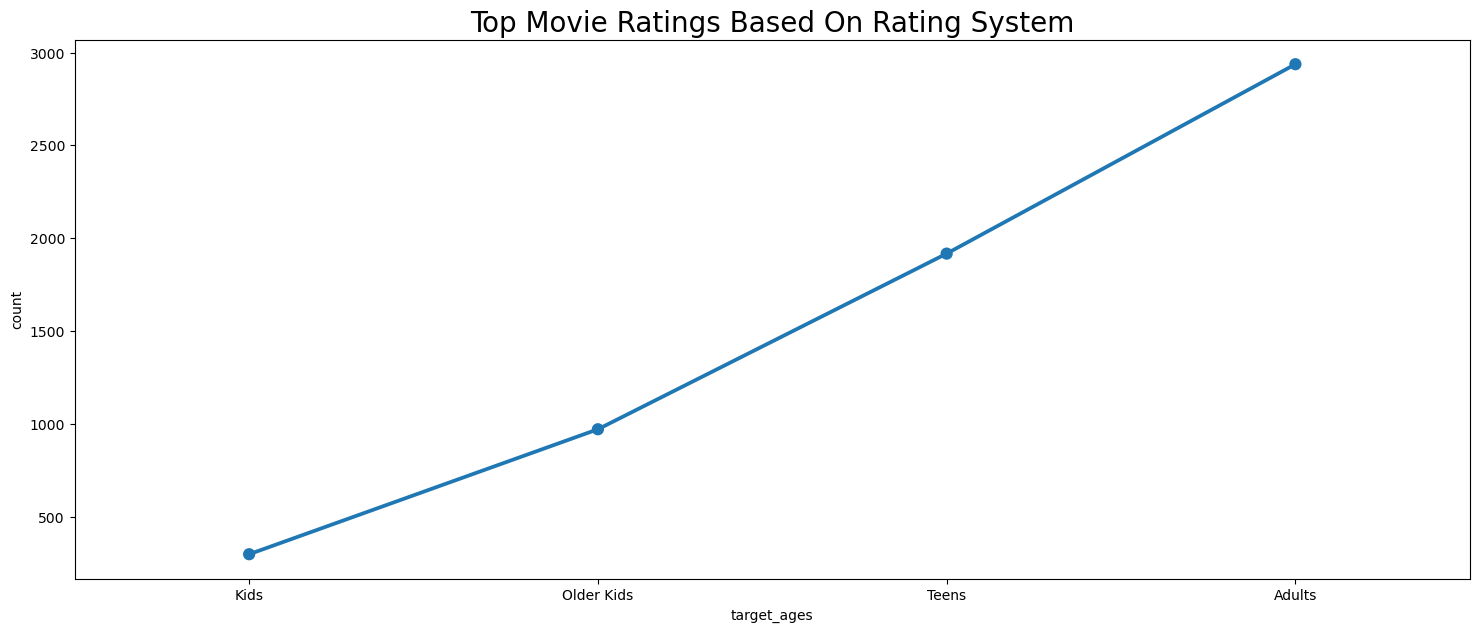

In [23]:
#영화 타입의 연령대별 등급 분포  
movie_ratings = df_movies.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=True)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

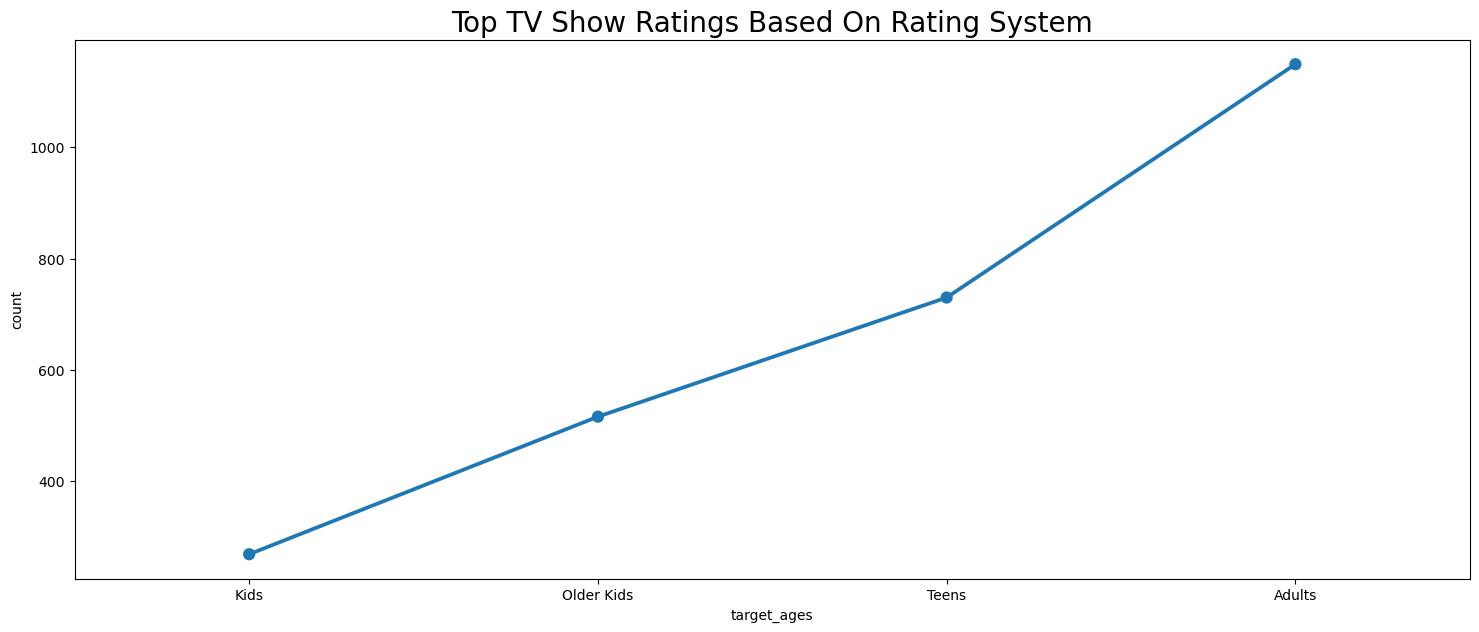

In [24]:
#티비 타입의 연령대별 등급 분포  
tv_ratings = df_tv.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=True)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

In [25]:
rating_df = nfx.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
rating_df = rating_df[rating_df['show_id'] != 0]
rating_df.columns = ['rating', 'target_ages', 'counts']
rating_df = rating_df.sort_values('target_ages')

fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='연령대별 등급 시각화',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

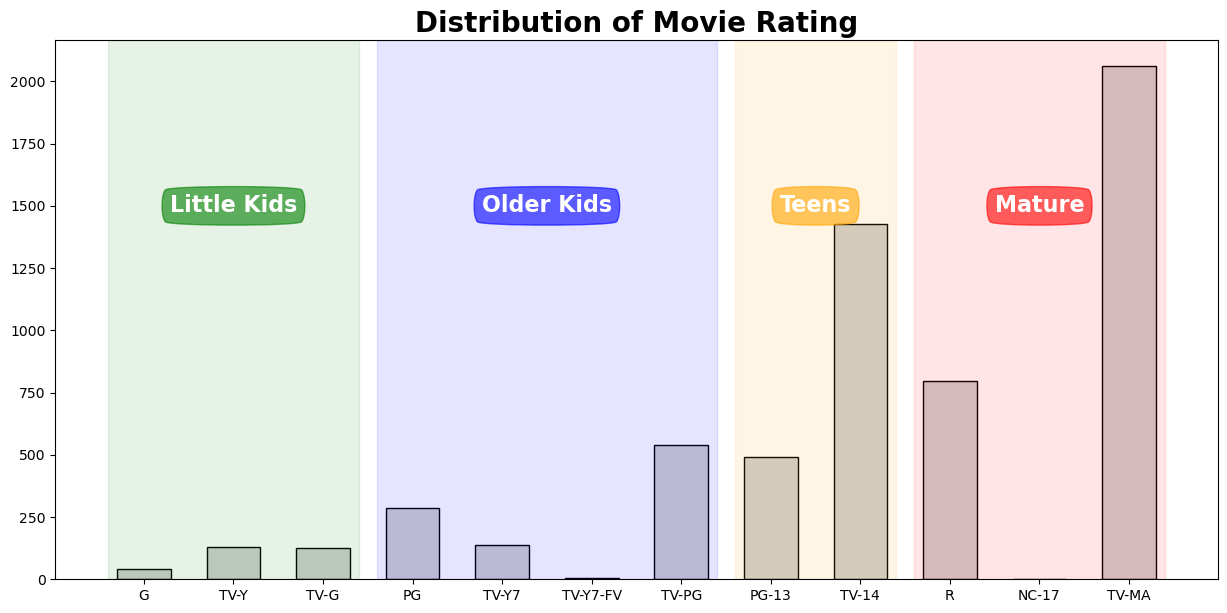

In [26]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

rating_barplot(movie_rating,'Movie', 1500)

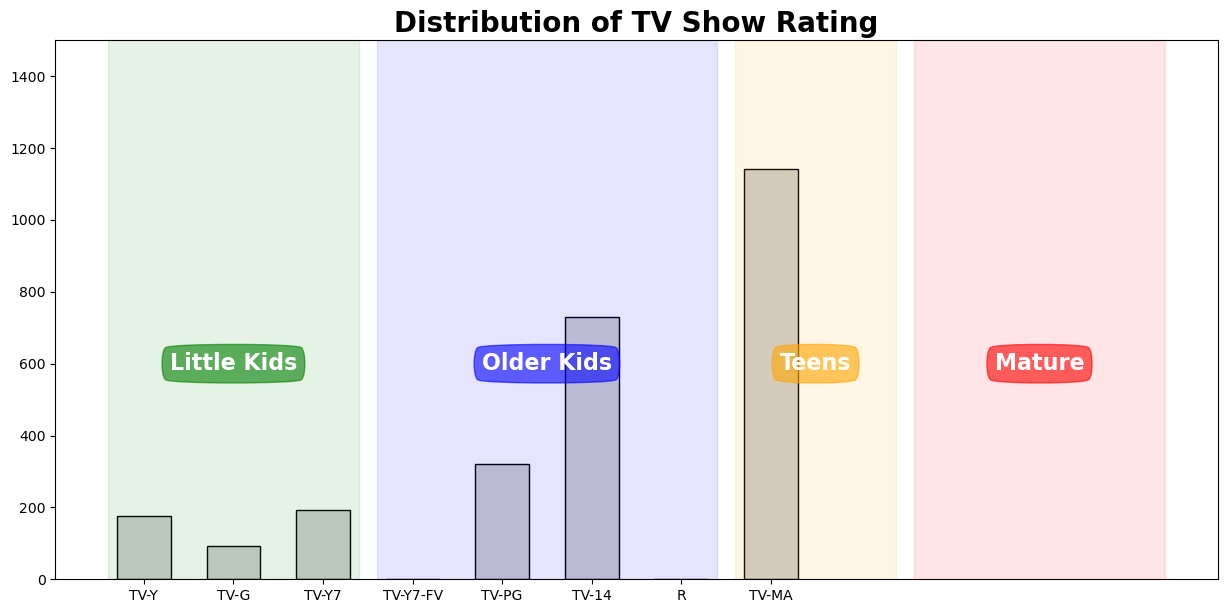

In [27]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)


연령대 등급별로 추가된 프로그램의 분포는 kids < older kids < teens < adults 순서이다.
또한, adults 등급 프로그램은 kids 등급 프로그램보다 대략 6배정도 많다.

성인 등급 프로그램 수가 가장 많고 연령대 등급이 높아질수록 프로그램 수가 많아지는 것을 근거로 넷플릭스는 어린이보다 성인 타깃에 집중하고 있는 것을 알 수 있다.

## 컨텐츠 추가 연도 분석

In [28]:
df_content = nfx['year_added'].value_counts().reset_index().rename(columns = {'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100* x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="black"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

본격적으로 넷플릭스에 컨텐츠가 추가된 연도는 2015년이다.
2015년부터 2019년까지 전체적인 컨텐츠가 빠르게 추가된 것을 확인 가능하고, 티비 컨텐츠는 영화 컨텐츠와 비교했을 때 상대적으로 낮은 상승폭을 보인다.
하지만, 2019년을 기점으로 상승 그래프는 하락세로 변화했으며
2019년에 발생한 사건을 회상하면, 코로나 바이러스 유행을 떠올릴 수 있다.

넷플릭스에 추가되는 프로그램의 수와 코로나 바이러스의 상관관계가 있다고 가정한다면, 코로나 바이러스가 미디어 산업에 악영향을 끼쳤다고 볼 수 있을 것이다.

##  영화 프로그램 상영 시간 분석

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/4227044782.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




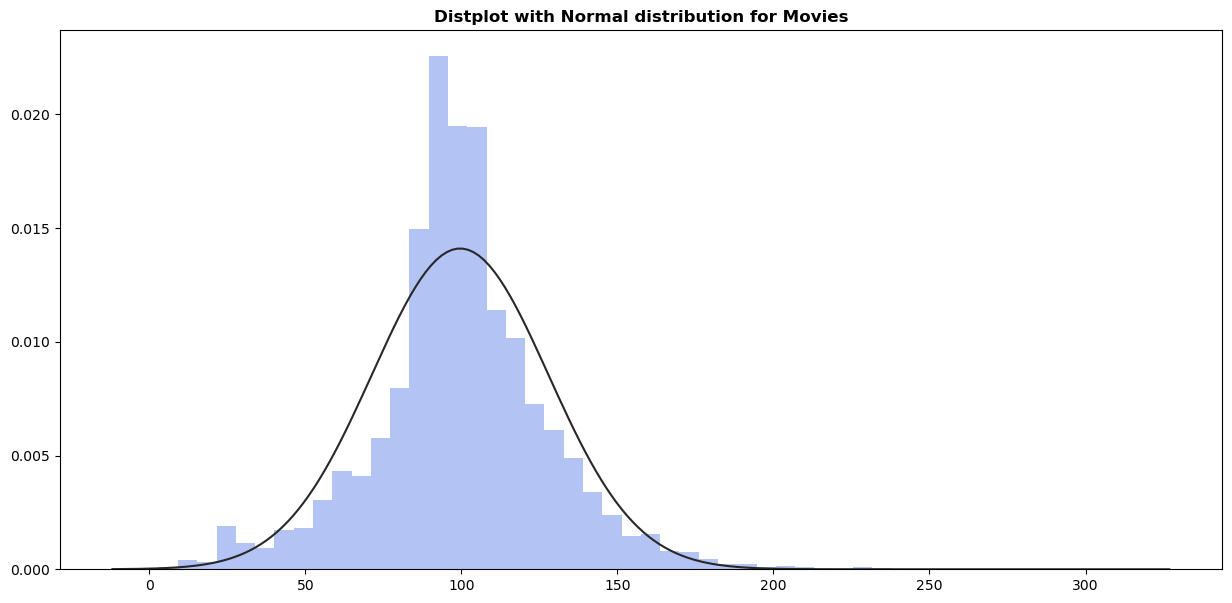

In [29]:
plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['royalblue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

넷플릭스에 추가된 영화의 길이는 90~110분 사이에 가장 많이 분포한다.


## 장르와 프로그램 길이 분석

In [30]:
# listed_in 장르별로 분리 후 합침

nfx1 = nfx.copy()
nfx1["listed_in"] = nfx1["listed_in"].str.split(",")
nfx1 = nfx1.explode("listed_in")
nfx1

show_id     type                 title         director        country  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
1         s3  TV Show             Ganglands  Julien Leclercq         France   
1         s3  TV Show             Ganglands  Julien Leclercq         France   
1         s3  TV Show             Ganglands  Julien Leclercq         France   
2         s6  TV Show         Midnight Mass    Mike Flanagan  United States   
...      ...      ...                   ...              ...            ...   
8787   s8801  TV Show    Zindagi Gulzar Hai        Not Given       Pakistan   
8787   s8801  TV Show    Zindagi Gulzar Hai        Not Given       Pakistan   
8787   s8801  TV Show    Zindagi Gulzar Hai        Not Given       Pakistan   
8788   s8784  TV Show                  Yoko        Not Given       Pakistan   
8789   s8786  TV Show                   YOM        Not Given       Pakistan   

      date_added  release_year rating  duration                listed_in  \
0      9/25/2021          2020  PG-13    90 min            Documentaries   
1      9/24/2021          2021  TV-MA  1 Season           Crime TV Shows   
1      9/24/2021          2021  TV-MA  1 Season   International TV Shows   
1      9/24/2021          2021  TV-MA  1 Season    TV Action & Adventure   
2      9/24/2021          2021  TV-MA  1 Season                TV Dramas   
...          ...           ...    ...       ...                      ...   
8787  12/15/2016          2012  TV-PG  1 Season   International TV Shows   
8787  12/15/2016          2012  TV-PG  1 Season        Romantic TV Shows   
8787  12/15/2016          2012  TV-PG  1 Season                TV Dramas   
8788   6/23/2018          2016   TV-Y  1 Season                 Kids' TV   
8789    6/7/2018          2016  TV-Y7  1 Season                 Kids' TV   

     target_ages  year_added  month_added  
0          Teens        2021            9  
1         Adults        2021            9  
1         Adults        2021            9  
1         Adults        2021            9  
2         Adults        2021            9  
...          ...         ...          ...  
8787  Older Kids        2016           12  
8787  Older Kids        2016           12  
8787  Older Kids        2016           12  
8788        Kids        2018            6  
8789  Older Kids        2018            6  

[19286 rows x 13 columns]

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/514903013.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/514903013.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



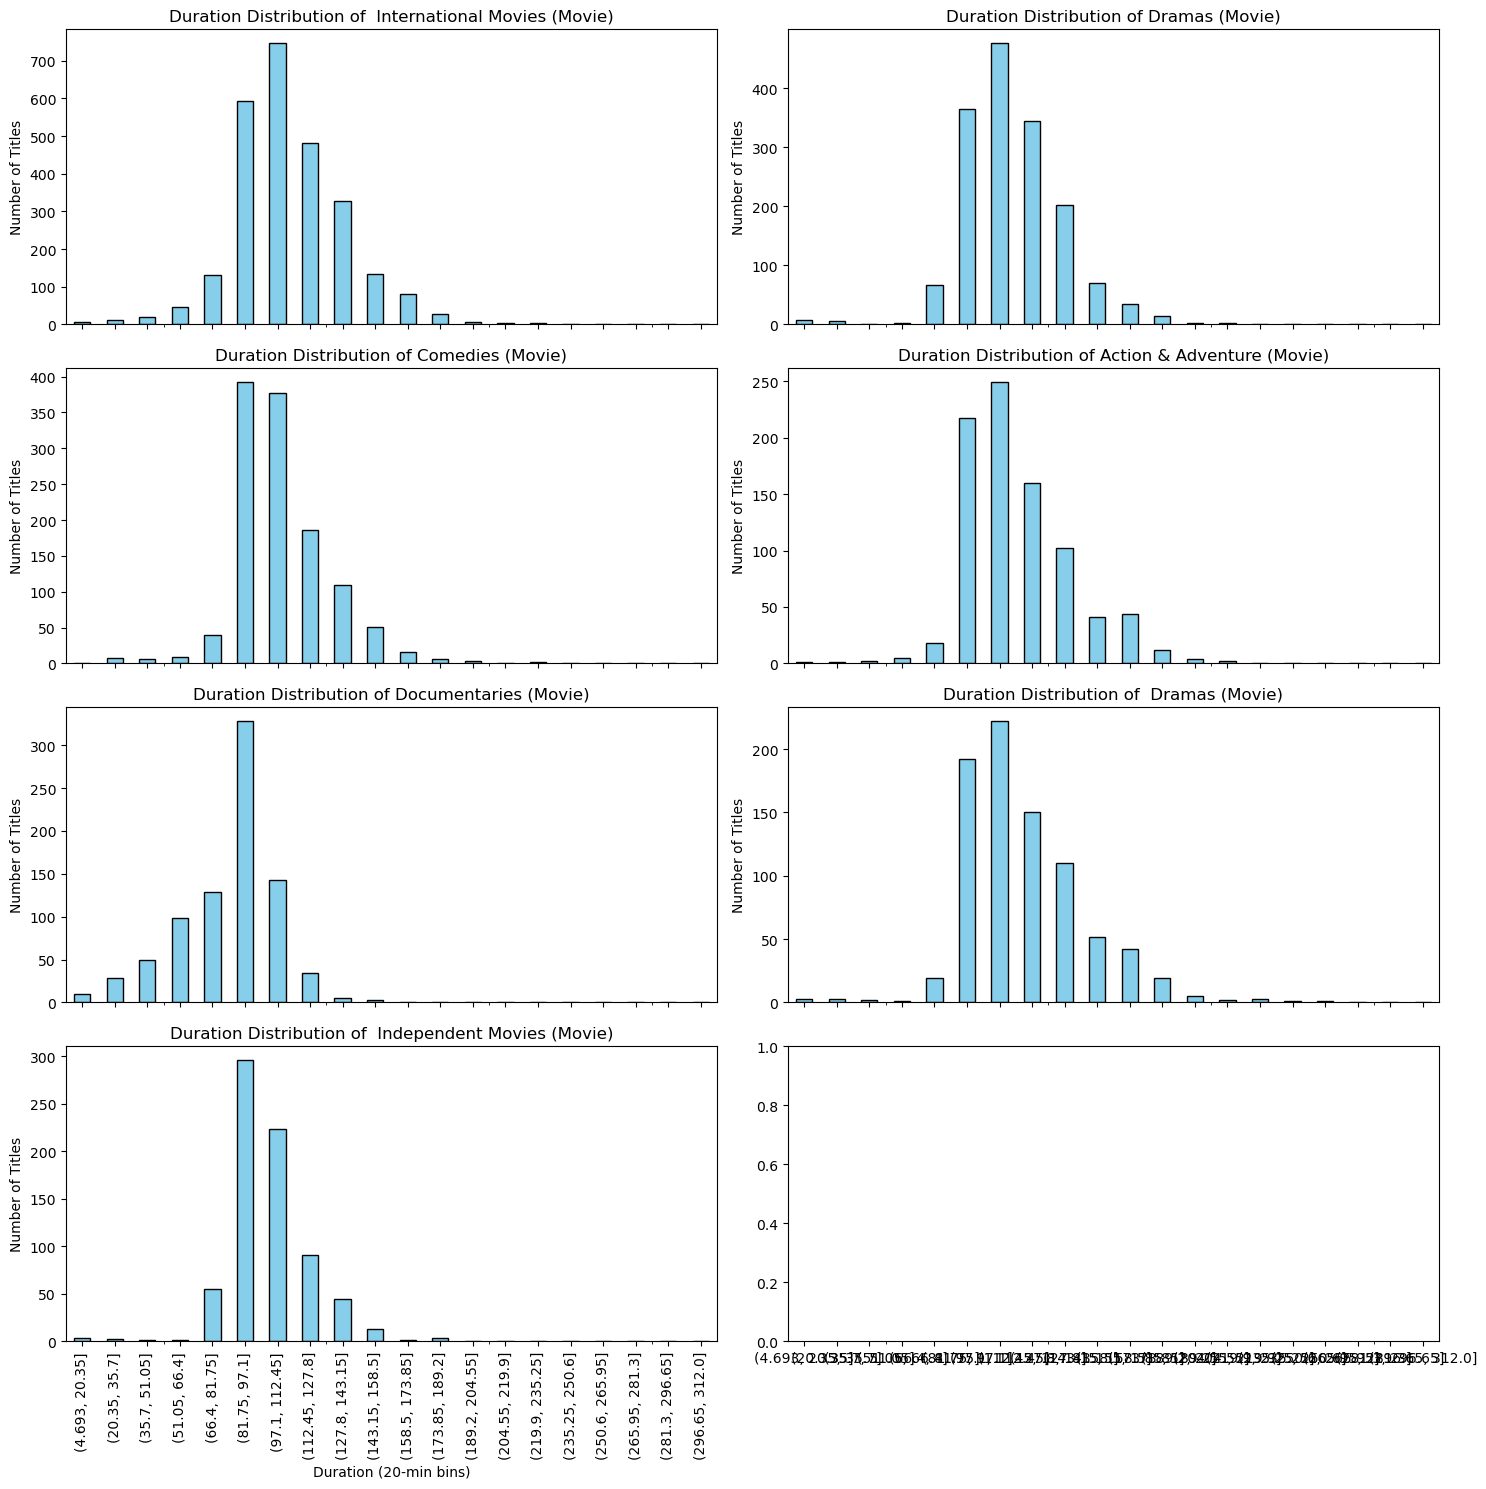

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/514903013.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/514903013.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



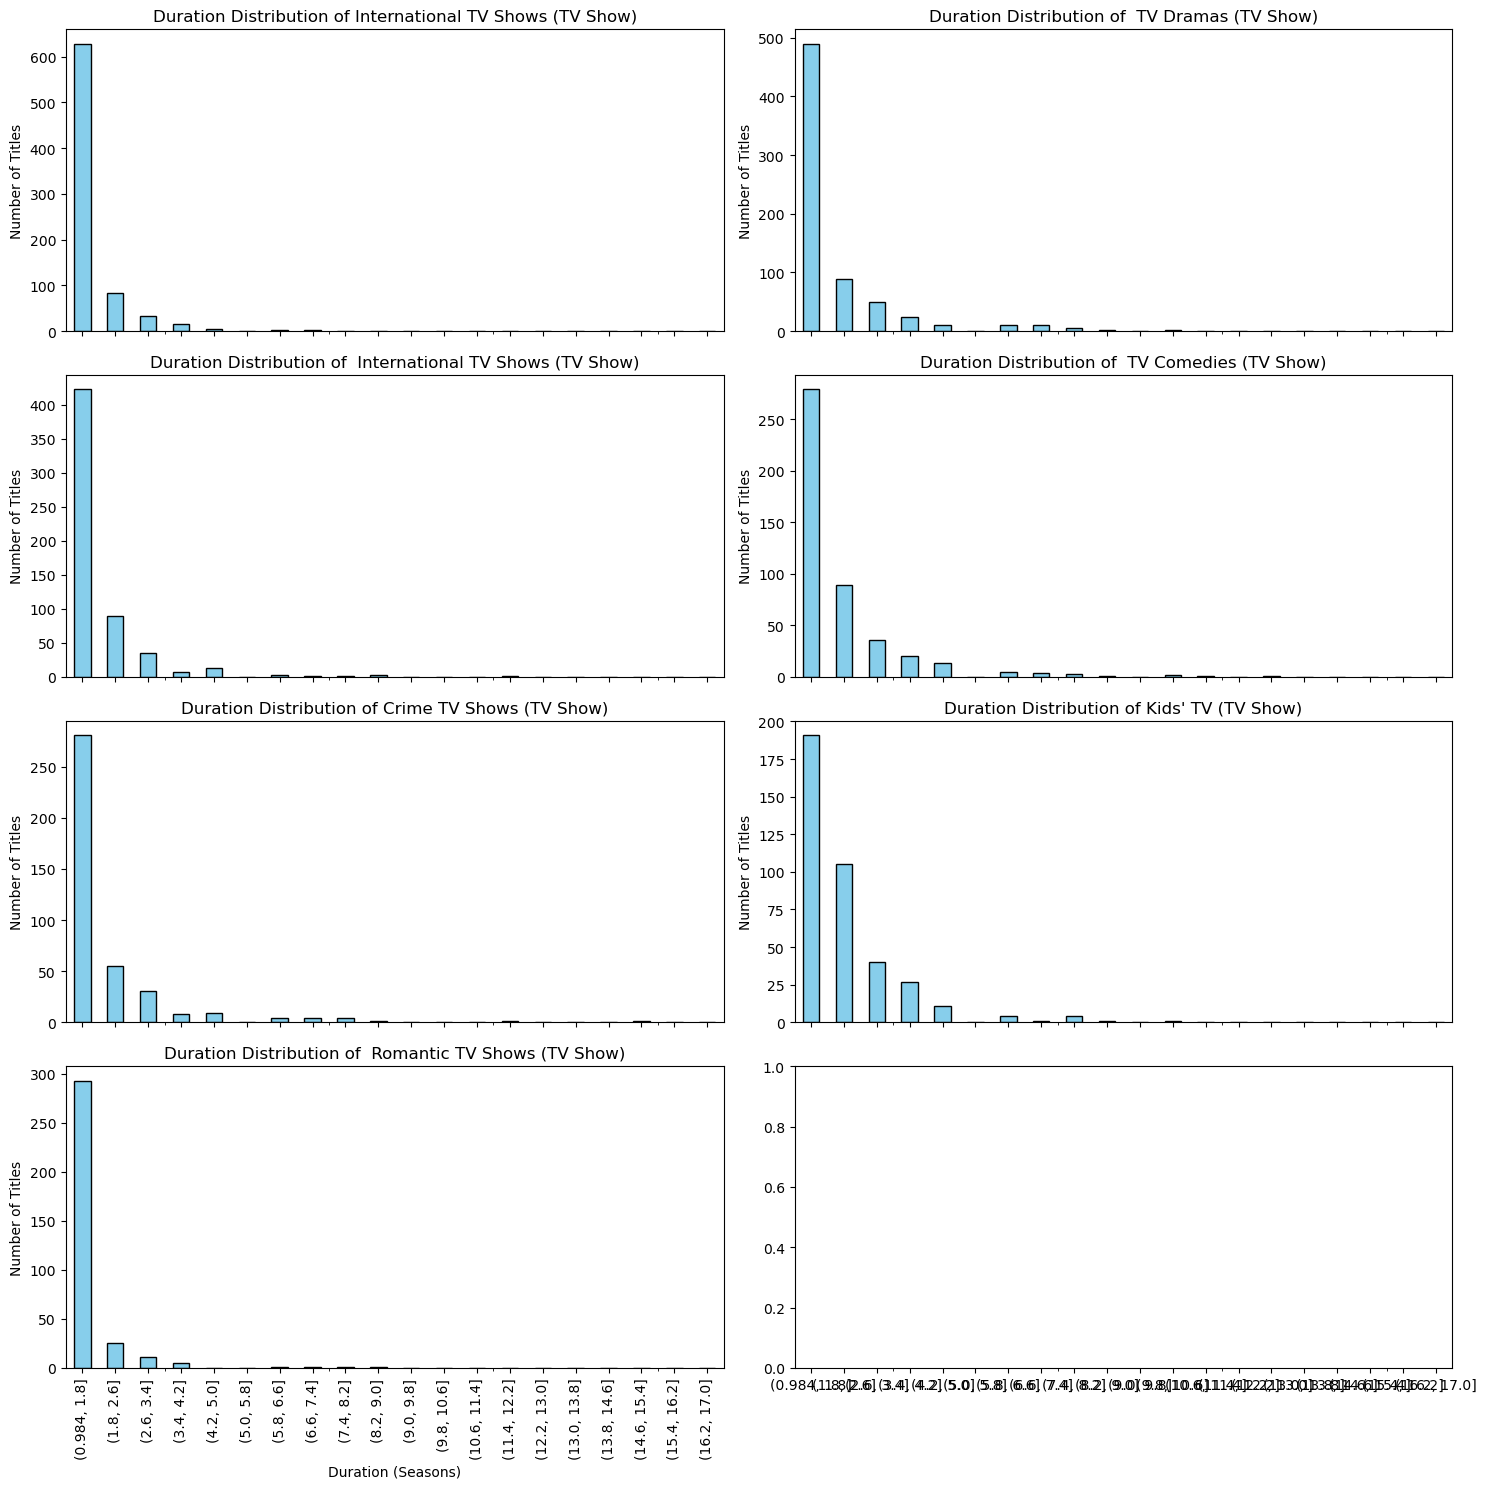

In [31]:
# 장르별 시청 시간

# Movie와 TV Show인 값들 따로 선택
movies_df = nfx1[nfx1['type'] == 'Movie']
tv_shows_df = nfx1[nfx1['type'] == 'TV Show']

# Movie와 TV Show 각각에 대해 처리
for df, type_name in zip([movies_df, tv_shows_df], ['Movie', 'TV Show']):
    # listed_in의 빈도수가 많은 상위 7개 항목 찾기
    top_genres = df['listed_in'].value_counts().head(7).index

    # top_genres에 해당하는 작품들만 선택
    filtered_df = df[df['listed_in'].isin(top_genres)]

    # TV Show의 경우, duration을 나타내기 위해 season 수로 변환
    if type_name == 'TV Show':
        filtered_df['duration'] = filtered_df['duration'].str.extract('(\d+)').astype(float)
        filtered_df['duration_bins'] = pd.cut(filtered_df['duration'], bins=20)
    else:
        # Movie의 경우, duration을 추출하여 20의 구간으로 나누기
        filtered_df['duration'] = filtered_df['duration'].str.extract('(\d+)').astype(float)
        filtered_df['duration_bins'] = pd.cut(filtered_df['duration'], bins=20)

    # 각 항목의 빈도수 계산
    duration_counts = filtered_df.groupby('listed_in')['duration_bins'].value_counts().unstack().T

    # 막대그래프 그리기
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), sharex=True)

    for i, (genre, ax) in enumerate(zip(top_genres, axes.flatten())):
        duration_counts[genre].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Duration Distribution of {genre} ({type_name})')
        ax.set_xlabel('Duration (Seasons)' if type_name == 'TV Show' else 'Duration (20-min bins)')
        ax.set_ylabel('Number of Titles')

    plt.tight_layout()
    plt.show()


## 국가별 프로그램 길이 분석

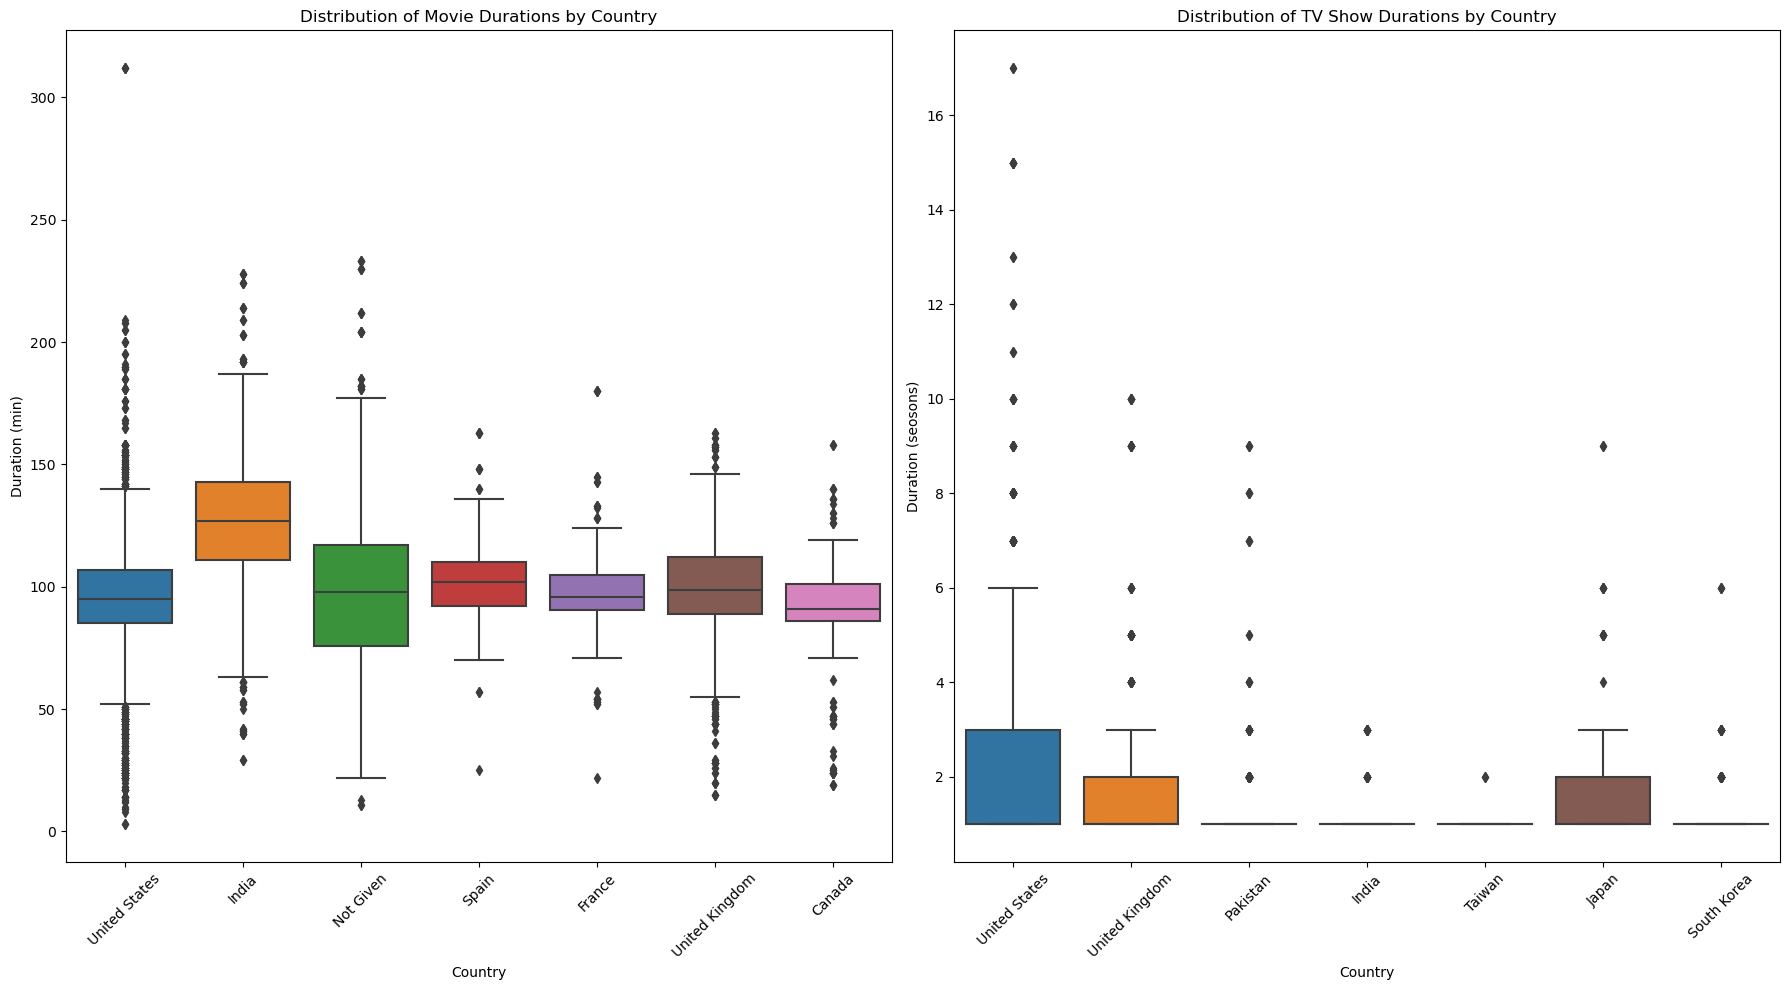

In [32]:
# 상위 7개국 타입별 프로그램 기간 분포 box plot

# Assuming your DataFrame is named nfx1
# If your DataFrame has a header, you can skip the header=None part
# Reading the provided DataFrame


# Step 1: Remove rows with empty 'duration'
nfx1 = nfx1[nfx1['duration'].notna()]

# Convert 'duration' to numeric
nfx1['duration'] = pd.to_numeric(nfx1['duration'].str.extract('(\d+)')[0])

# Step 2: Find top 7 countries with the highest frequency for both 'Movie' and 'TV Show'
top_countries_movie = nfx1[nfx1['type'] == 'Movie']['country'].value_counts().head(7).index
top_countries_tv_show = nfx1[nfx1['type'] == 'TV Show']['country'].value_counts().head(7).index

# Step 3: Create boxplots for both 'Movie' and 'TV Show'
plt.figure(figsize=(18, 10))

# Boxplot for 'Movie'
plt.subplot(1, 2, 1)
sns.boxplot(x='country', y='duration', data=nfx1[(nfx1['type'] == 'Movie') & (nfx1['country'].isin(top_countries_movie))])
plt.title('Distribution of Movie Durations by Country')
plt.xlabel('Country')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)

# Boxplot for 'TV Show'
plt.subplot(1, 2, 2)
sns.boxplot(x='country', y='duration', data=nfx1[(nfx1['type'] == 'TV Show') & (nfx1['country'].isin(top_countries_tv_show))])
plt.title('Distribution of TV Show Durations by Country')
plt.xlabel('Country')
plt.ylabel('Duration (seosons)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


## 국가별 인기 장르 분석

In [33]:
show_genre= nfx.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='show_genre_count')
show_genre

listed_in     type  \
0                                    Action & Adventure    Movie   
1                                    Action & Adventure  TV Show   
2                    Action & Adventure, Anime Features    Movie   
3                    Action & Adventure, Anime Features  TV Show   
4     Action & Adventure, Anime Features, Children &...    Movie   
...                                                 ...      ...   
1021                  TV Sci-Fi & Fantasy, TV Thrillers  TV Show   
1022                                           TV Shows    Movie   
1023                                           TV Shows  TV Show   
1024                                          Thrillers    Movie   
1025                                          Thrillers  TV Show   

      show_genre_count  
0                  128  
1                    0  
2                    1  
3                    0  
4                    4  
...                ...  
1021                 1  
1022                 0  
1023                16  
1024                65  
1025                 0  

[1026 rows x 3 columns]

In [34]:
#top20 genre
top20_genre=show_genre.query("`show_genre_count` >= 110")
top20_genre

listed_in     type  \
0                                   Action & Adventure    Movie   
78    Action & Adventure, Dramas, International Movies    Movie   
240                           Children & Family Movies    Movie   
248                 Children & Family Movies, Comedies    Movie   
368                                           Comedies    Movie   
396               Comedies, Dramas, Independent Movies    Movie   
398             Comedies, Dramas, International Movies    Movie   
432                     Comedies, International Movies    Movie   
438    Comedies, International Movies, Romantic Movies    Movie   
487  Crime TV Shows, International TV Shows, TV Dramas  TV Show   
546                                      Documentaries    Movie   
560                Documentaries, International Movies    Movie   
616                                             Dramas    Movie   
636   Dramas, Independent Movies, International Movies    Movie   
650                       Dramas, International Movies    Movie   
656      Dramas, International Movies, Romantic Movies    Movie   
662            Dramas, International Movies, Thrillers    Movie   
823                  International TV Shows, TV Dramas  TV Show   
843                                           Kids' TV  TV Show   
938                                    Stand-Up Comedy    Movie   

     show_genre_count  
0                 128  
78                132  
240               215  
248               201  
368               110  
396               116  
398               274  
432               176  
438               152  
487               110  
546               359  
560               186  
616               137  
636               252  
650               362  
656               178  
662               134  
823               121  
843               219  
938               334

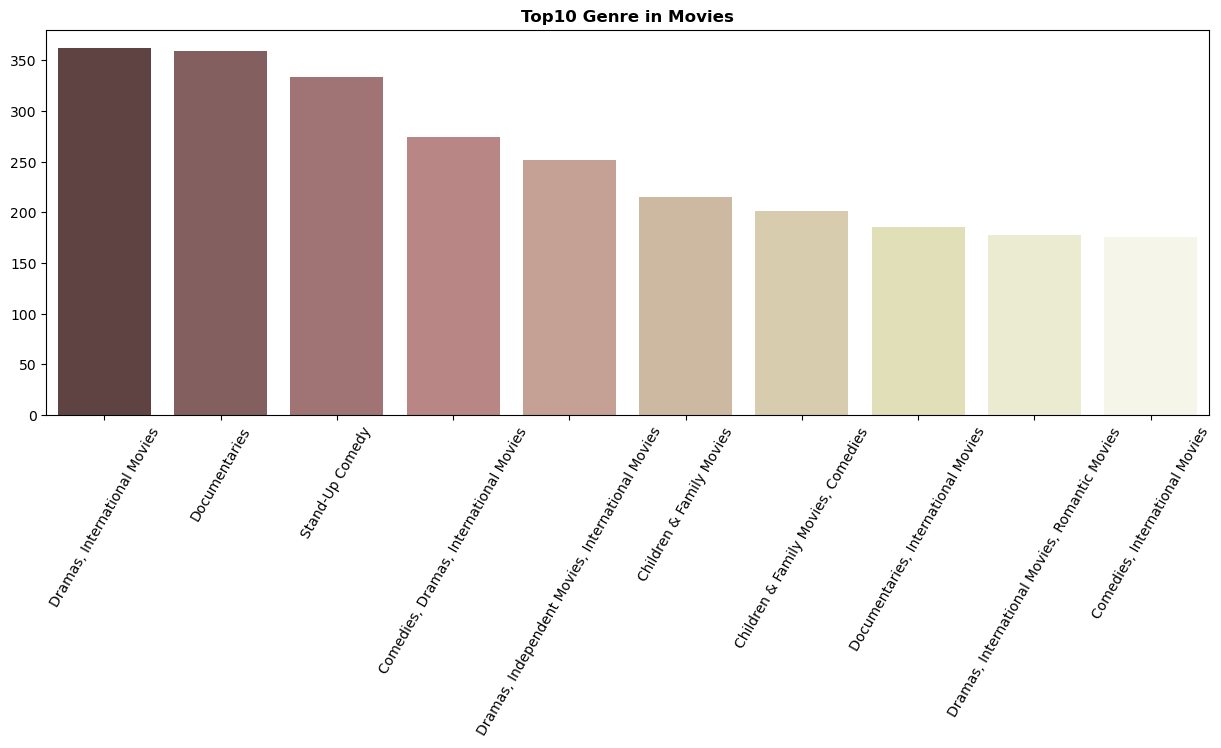

In [35]:
#movies's top10 genre
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

넷플릭스에 추가된 영화 장르의 수는 드라마가 1위, 다큐멘터리 2위, 스탠드-업 코미디가 3위이다.

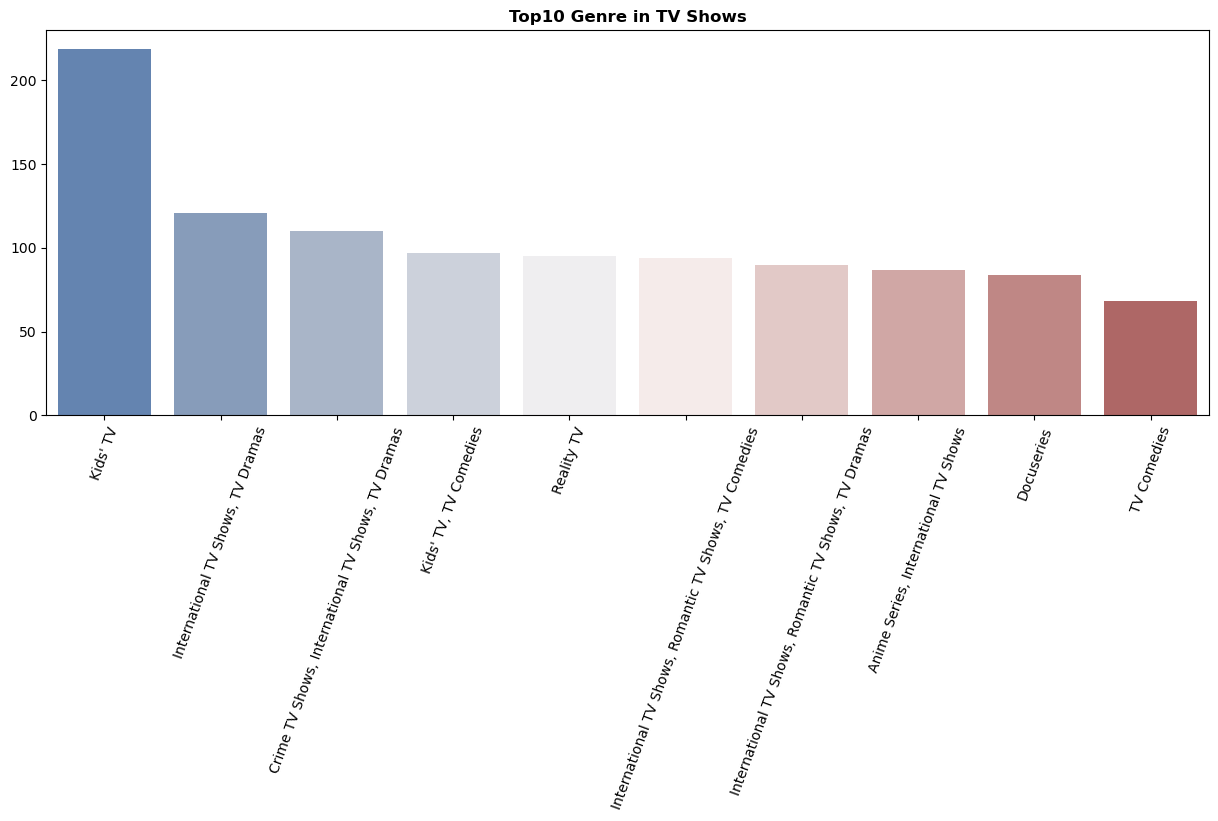

In [36]:
#tv's top10 genre
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

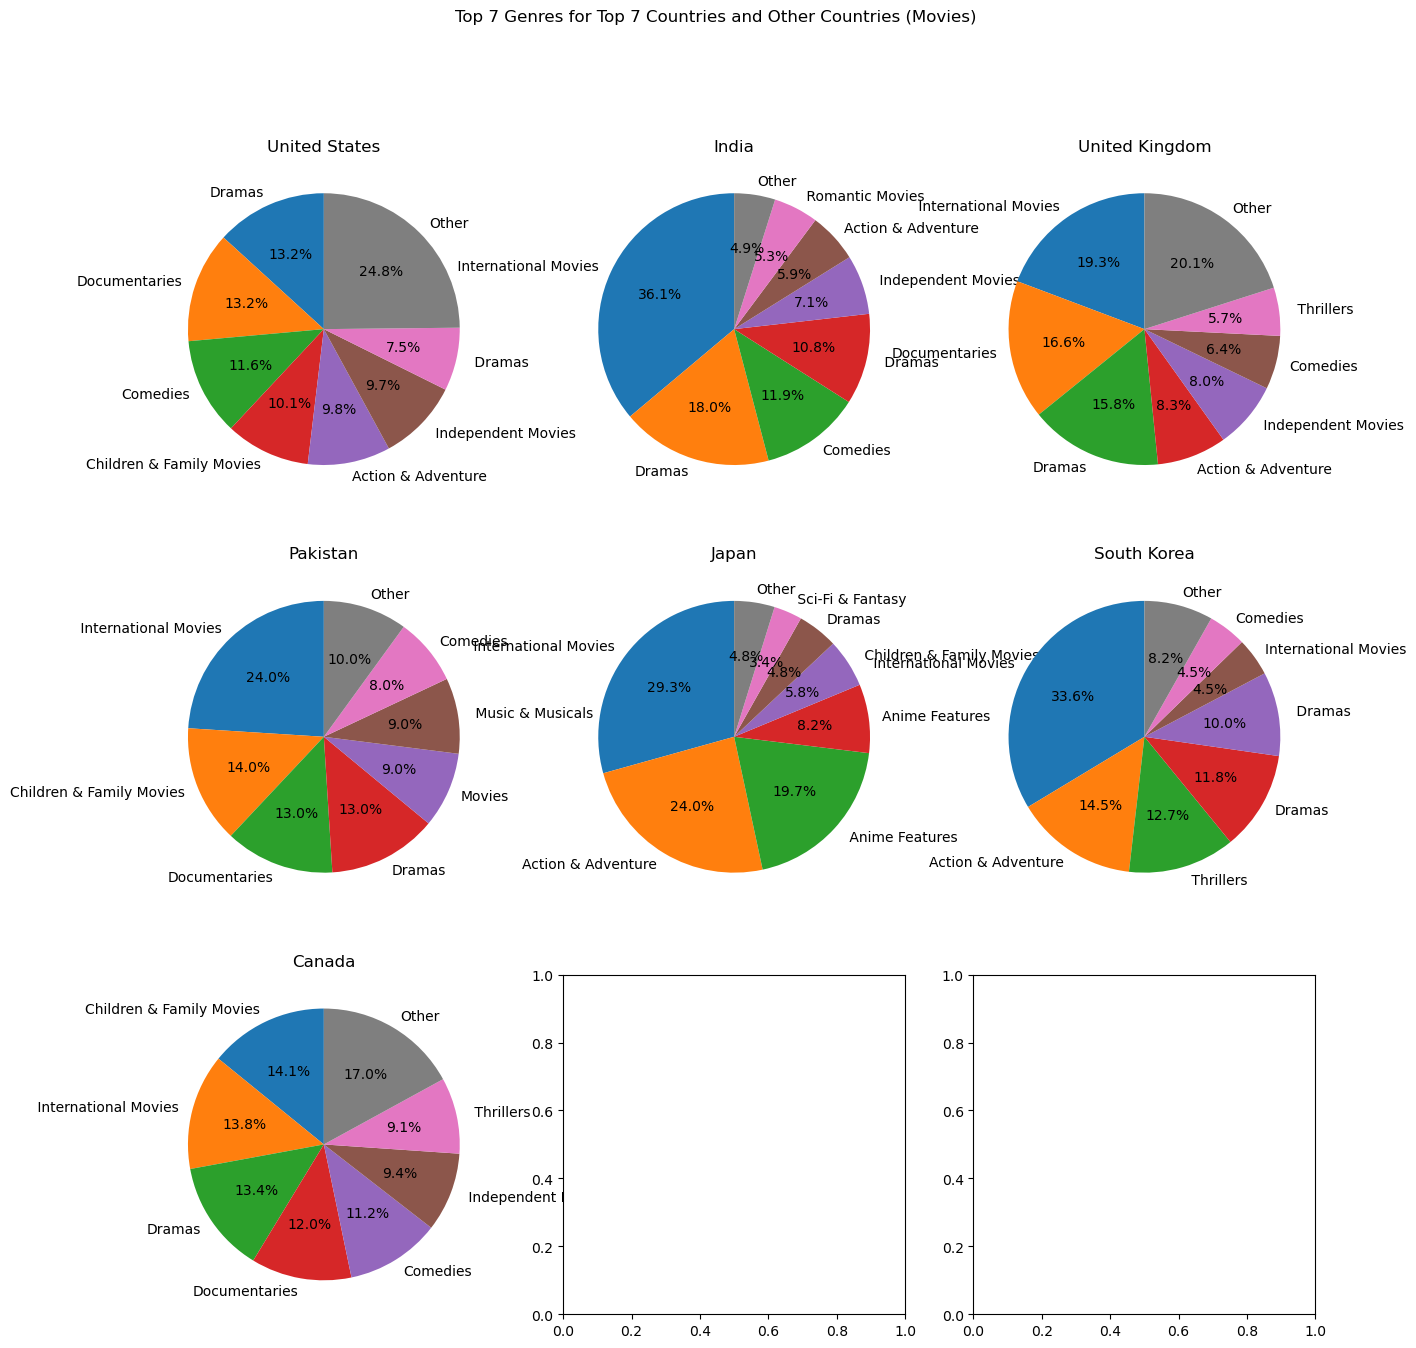

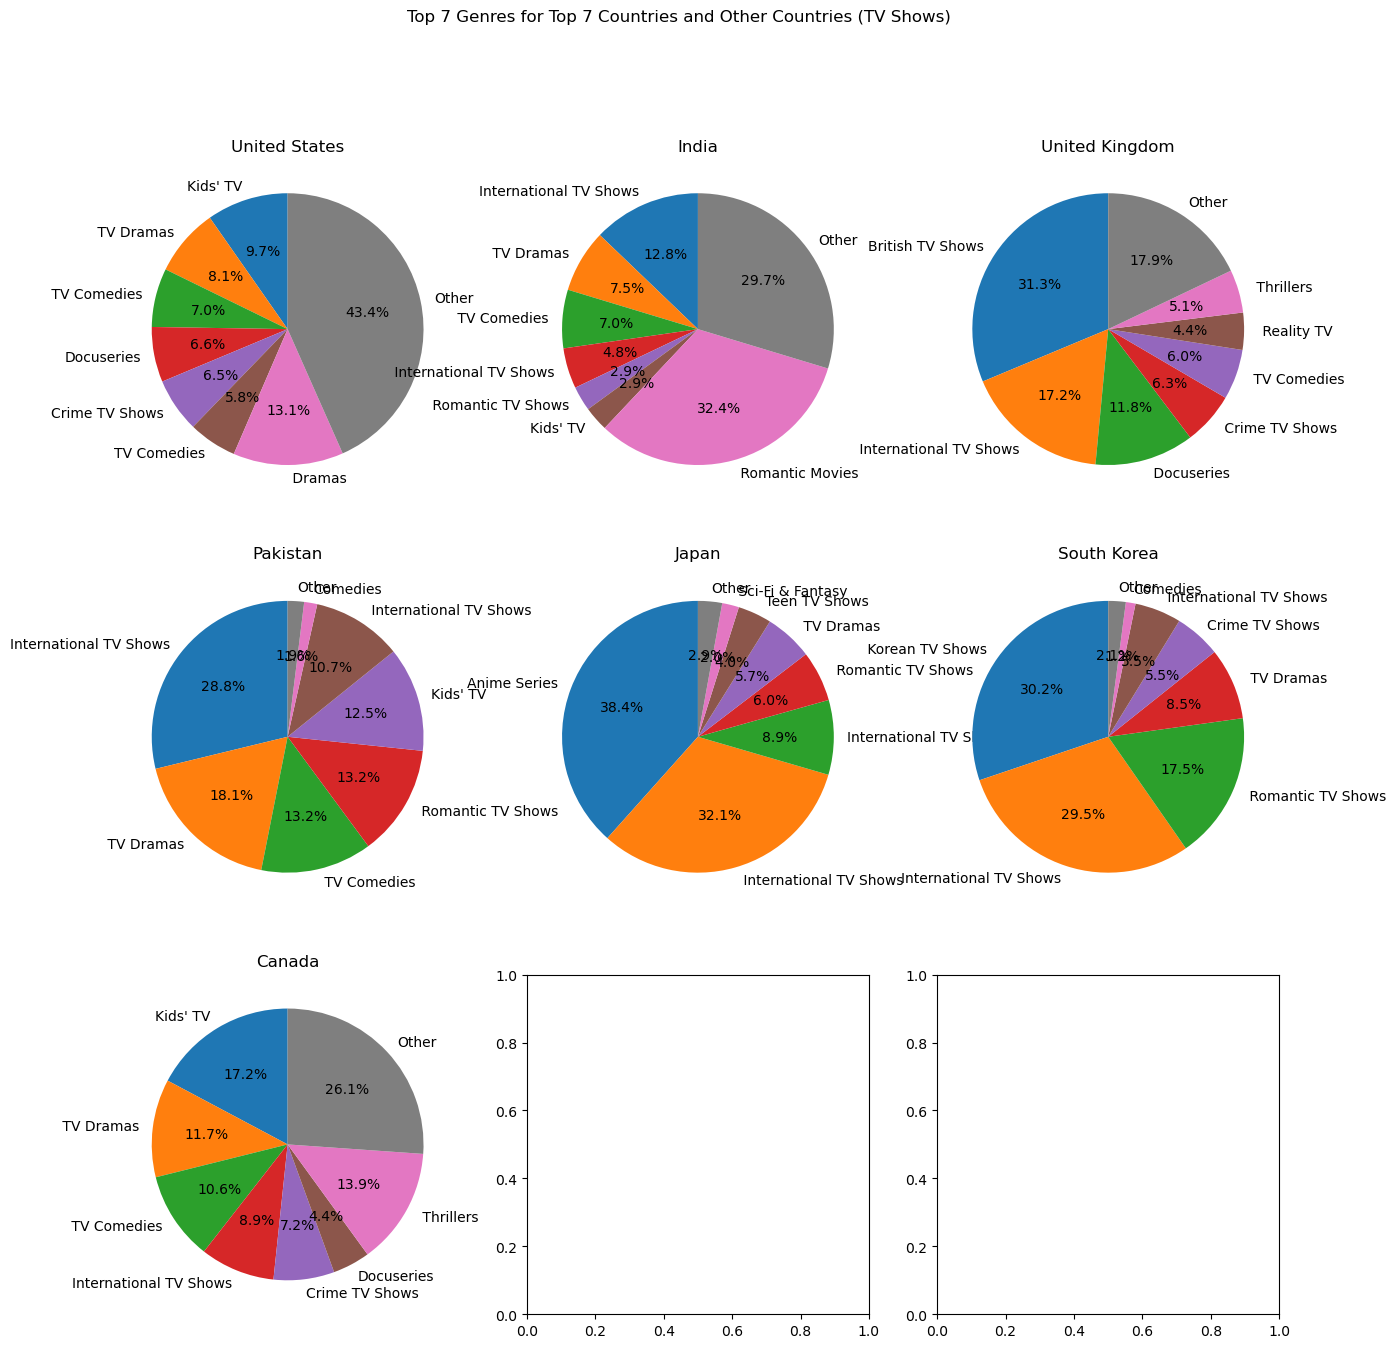

In [37]:

movie_data = nfx1[nfx1['type'] == 'Movie']
tvshow_data = nfx1[nfx1['type'] == 'TV Show']
# Assuming nfx1, movie_data, and tvshow_data are already defined
top_countries = nfx1[nfx1['country'] != 'Not Given']['country'].value_counts().head(7).index

# ... (Your existing code)
def plot_pie_chart(data, title):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    fig.suptitle(title)

    for i, country in enumerate(top_countries):
        row, col = divmod(i, 3)
        ax = axes[row, col]
        genres_data = pd.concat([data.get(country, pd.Series({'Other': 0})), other_genres_by_country.get(country, pd.Series({'Other': 0}))])
        ax.pie(genres_data, labels=genres_data.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(country)


    plt.show()
# 5. 상위 7개 국가와 'other_country' 항목까지 총 8개의 파이차트 생성

# Movie에 대한 파이 차트
top_genres_by_country = {}
other_genres_by_country = {}

for country in top_countries:
    country_data = movie_data[movie_data['country'] == country]
    top_genres = country_data['listed_in'].value_counts().head(6)
    top_genres_by_country[country] = top_genres

    # "기타" 항목을 추가
    other_genres = country_data[~country_data['listed_in'].isin(top_genres.index)]['listed_in']
    other_genres_count = other_genres.value_counts()
    top_other_genres = other_genres_count.head(1)
    remaining_count = other_genres_count[6:].sum()
    top_other_genres['Other'] = remaining_count
    other_genres_by_country[country] = top_other_genres

# Add 'other_country' category for Movie data
other_country_data = movie_data[movie_data['country'] == 'other_country']
top_genres_other_country = other_country_data['listed_in'].value_counts().head(1)
remaining_count_other_country = other_country_data['listed_in'].value_counts()[1:].sum()
top_genres_other_country['Other'] = remaining_count_other_country
other_genres_by_country['other_country'] = top_genres_other_country

# TV Show에 대한 파이 차트
top_genres_by_country_tvshow = {}
other_genres_by_country_tvshow = {}

for country in top_countries:
    country_data = tvshow_data[tvshow_data['country'] == country]
    top_genres = country_data['listed_in'].value_counts().head(6)
    top_genres_by_country_tvshow[country] = top_genres

    # "기타" 항목을 추가
    other_genres = country_data[~country_data['listed_in'].isin(top_genres.index)]['listed_in']
    other_genres_count = other_genres.value_counts()
    top_other_genres = other_genres_count.head(7)
    remaining_count = other_genres_count[6:].sum()
    top_other_genres['Other'] = remaining_count
    other_genres_by_country_tvshow[country] = top_other_genres

# Add 'other_country' category for TV Show data
other_country_data_tvshow = tvshow_data[tvshow_data['country'] == 'other_country']
top_genres_other_country_tvshow = other_country_data_tvshow['listed_in'].value_counts().head(1)
remaining_count_other_country_tvshow = other_country_data_tvshow['listed_in'].value_counts()[1:].sum()
top_genres_other_country_tvshow['Other'] = remaining_count_other_country_tvshow
other_genres_by_country_tvshow['other_country'] = top_genres_other_country_tvshow

# Movie에 대한 파이 차트
plot_pie_chart(top_genres_by_country, 'Top 7 Genres for Top 7 Countries and Other Countries (Movies)')
# TV Show에 대한 파이 차트
plot_pie_chart(top_genres_by_country_tvshow, 'Top 7 Genres for Top 7 Countries and Other Countries (TV Shows)')



미국을 제외한 상위 7국가들은 대부분 international movies 장르 비율이 높게 나타난다.

마찬가지로, 티비 타입도 international tv show비율이 높은 것을 확인 가능하다.

## 넷플릭스 제작 국가 분석

In [38]:
# top20 country
show_origin= nfx.groupby(['country','type'])[ 'type'].count().reset_index(name='show_count')
top20_country=show_origin.query("`show_count` >= 81")
top20_country


country     type  show_count
20           Canada    Movie         187
21           Canada  TV Show          84
36            Egypt    Movie         109
40           France    Movie         147
58            India    Movie         976
59            India  TV Show          81
60        Indonesia    Movie          84
72            Japan    Movie          87
73            Japan  TV Show         172
88           Mexico    Movie          90
98          Nigeria    Movie          96
102       Not Given    Movie         257
105        Pakistan  TV Show         350
137     South Korea  TV Show         165
140           Spain    Movie         129
152          Turkey    Movie          82
158  United Kingdom    Movie         386
159  United Kingdom  TV Show         251
160   United States    Movie        2394
161   United States  TV Show         845

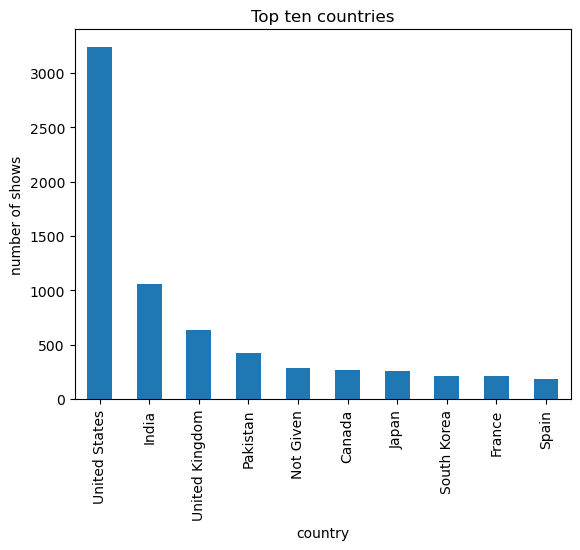

In [39]:
per_country = nfx.groupby('country')['show_id'].count()
per_country.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top ten countries')
plt.xlabel('country')
plt.ylabel('number of shows')
plt.show()

가장 많은 프로그램을 제작한 국가는 미국으로 2위인 인도와 3배 정도의 차이가 있다.

상위 10개 국가를 대륙별로 나눠보면 북아메리카는 2개 국가(미국, 캐나다), 아시아는 4개 국가(인도, 파키스탄, 일본, 한국), 유럽 3개 국가(영국, 프랑스, 스페인), not given(국가 지정 x)1개로 구성된다.
반대로 상위 10개 국가에 없는 대륙은 아프리카, 오세아니아, 남아메리카인 것을 확인할 수 있다.

## director  분석

In [40]:
#grouped by directors of show and type
show_director= nfx.groupby(['director','type'])[ 'director'].count().reset_index(name='show_count')
show_director

director     type  show_count
0             A. L. Vijay    Movie           2
1             A. L. Vijay  TV Show           0
2            A. Raajdheep    Movie           1
3            A. Raajdheep  TV Show           0
4               A. Salaam    Movie           1
...                   ...      ...         ...
9049  Óskar Thór Axelsson  TV Show           0
9050     Ömer Faruk Sorak    Movie           2
9051     Ömer Faruk Sorak  TV Show           0
9052         Şenol Sönmez    Movie           2
9053         Şenol Sönmez  TV Show           0

[9054 rows x 3 columns]

In [41]:
#program's top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

director     type  show_count
253      Alastair Fothergill  TV Show          14
1368     Cathy Garcia-Molina    Movie          13
3572             Jay Chapman    Movie          12
3578               Jay Karas    Movie          14
5194            Marcus Raboy    Movie          15
5340         Martin Scorsese    Movie          12
6132               Not Given    Movie         173
6133               Not Given  TV Show        2415
6784           Rajiv Chilaka    Movie          19
6886  Raúl Campos, Jan Suter    Movie          18
8092             Suhas Kadav    Movie          16
8958         Youssef Chahine    Movie          12

## 개봉 연도와 프로그램 길이의 상관관계 

In [42]:
movies_df = nfx[nfx['type'] == 'Movie']
movies_df.head()

show_id   type                             title         director  \
0      s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
3     s14  Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8  Movie                           Sankofa     Haile Gerima   
6     s10  Movie                      The Starling   Theodore Melfi   
7    s939  Movie   Motu Patlu in the Game of Zones      Suhas Kadav   

         country date_added  release_year rating duration  \
0  United States  9/25/2021          2020  PG-13   90 min   
3         Brazil  9/22/2021          2021  TV-PG   91 min   
4  United States  9/24/2021          1993  TV-MA  125 min   
6  United States  9/24/2021          2021  PG-13  104 min   
7          India   5/1/2021          2019  TV-Y7   87 min   

                                           listed_in target_ages  year_added  \
0                                      Documentaries       Teens        2021   
3                 Children & Family Movies, Comedies  Older Kids        2021   
4   Dramas, Independent Movies, International Movies      Adults        2021   
6                                   Comedies, Dramas       Teens        2021   
7  Children & Family Movies, Comedies, Music & Mu...  Older Kids        2021   

   month_added  
0            9  
3            9  
4            9  
6            9  
7            5

In [43]:
tv_shows_df = nfx[nfx['type'] == 'TV Show']
tv_shows_df.head()

show_id     type                            title         director  \
1       s3  TV Show                        Ganglands  Julien Leclercq   
2       s6  TV Show                    Midnight Mass    Mike Flanagan   
5       s9  TV Show    The Great British Baking Show  Andy Devonshire   
17      s4  TV Show            Jailbirds New Orleans        Not Given   
18     s15  TV Show  Crime Stories: India Detectives        Not Given   

           country date_added  release_year rating   duration  \
1           France  9/24/2021          2021  TV-MA   1 Season   
2    United States  9/24/2021          2021  TV-MA   1 Season   
5   United Kingdom  9/24/2021          2021  TV-14  9 Seasons   
17        Pakistan  9/24/2021          2021  TV-MA   1 Season   
18        Pakistan  9/22/2021          2021  TV-MA   1 Season   

                                            listed_in target_ages  year_added  \
1   Crime TV Shows, International TV Shows, TV Act...      Adults        2021   
2                  TV Dramas, TV Horror, TV Mysteries      Adults        2021   
5                        British TV Shows, Reality TV       Teens        2021   
17                             Docuseries, Reality TV      Adults        2021   
18       British TV Shows, Crime TV Shows, Docuseries      Adults        2021   

    month_added  
1             9  
2             9  
5             9  
17            9  
18            9

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/2742622920.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



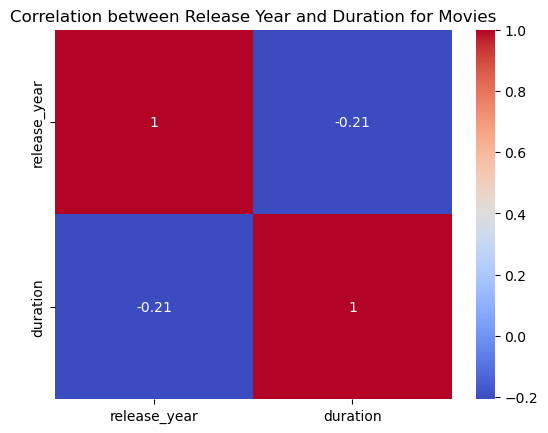

Correlation between Release Year and Duration:
              release_year  duration
release_year      1.000000 -0.206419
duration         -0.206419  1.000000


In [44]:
# 히트맵 통해서 상관관계 시각화

selected_data = movies_df[['release_year', 'duration']]
selected_data['duration'] = selected_data['duration'].str.extract('(\d+)').astype(float)
correlation = selected_data.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Release Year and Duration for Movies")
plt.show()

print("Correlation between Release Year and Duration:")
print(correlation)

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/1973672255.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



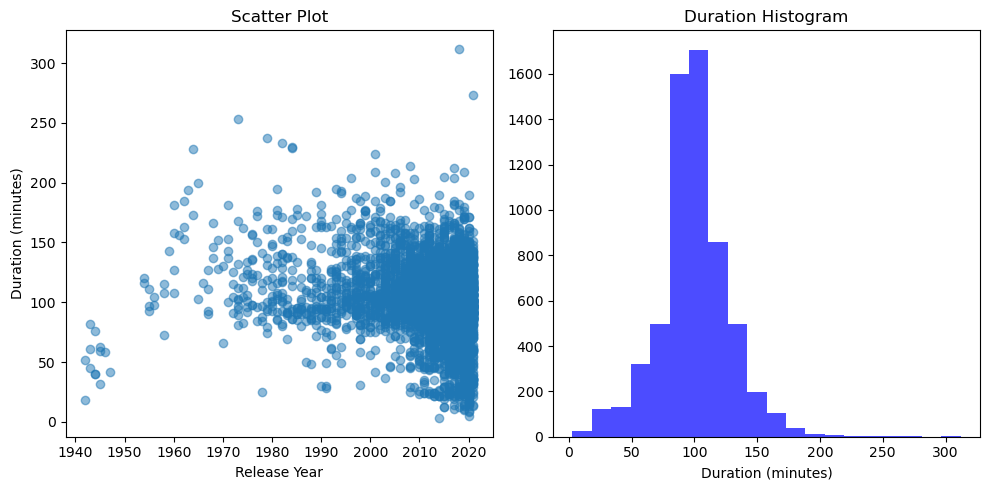

Correlation between Release Year and Duration:
              release_year  duration
release_year      1.000000 -0.206419
duration         -0.206419  1.000000


In [45]:
# 산점도 + 히스토그램을 통한 시각화

selected_data = movies_df[['release_year', 'duration']]
selected_data['duration'] = selected_data['duration'].str.extract('(\d+)').astype(float)

correlation = selected_data.corr()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(selected_data['release_year'], selected_data['duration'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')

plt.subplot(1, 2, 2)
plt.hist(selected_data['duration'], bins=20, color='blue', alpha=0.7)
plt.title('Duration Histogram')
plt.xlabel('Duration (minutes)')

plt.tight_layout()
plt.show()

print("Correlation between Release Year and Duration:")
print(correlation)

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/246127859.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



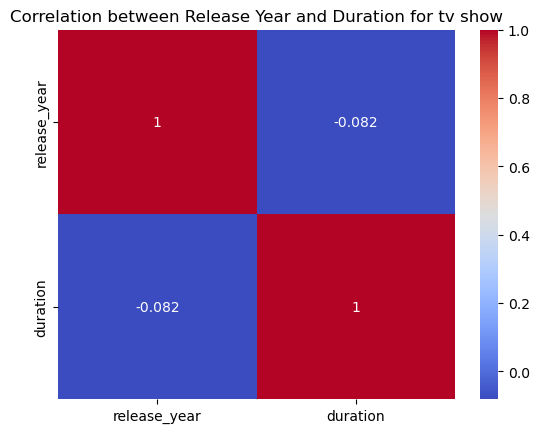

Correlation between Release Year and Duration:
              release_year  duration
release_year      1.000000 -0.081586
duration         -0.081586  1.000000


In [46]:
# 히트맵 통해서 상관관계 시각화

selected_data = tv_shows_df[['release_year', 'duration']]
selected_data['duration'] = selected_data['duration'].str.extract('(\d+)').astype(float)
correlation = selected_data.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Release Year and Duration for tv show")
plt.show()

print("Correlation between Release Year and Duration:")
print(correlation)

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_38252/3756718630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



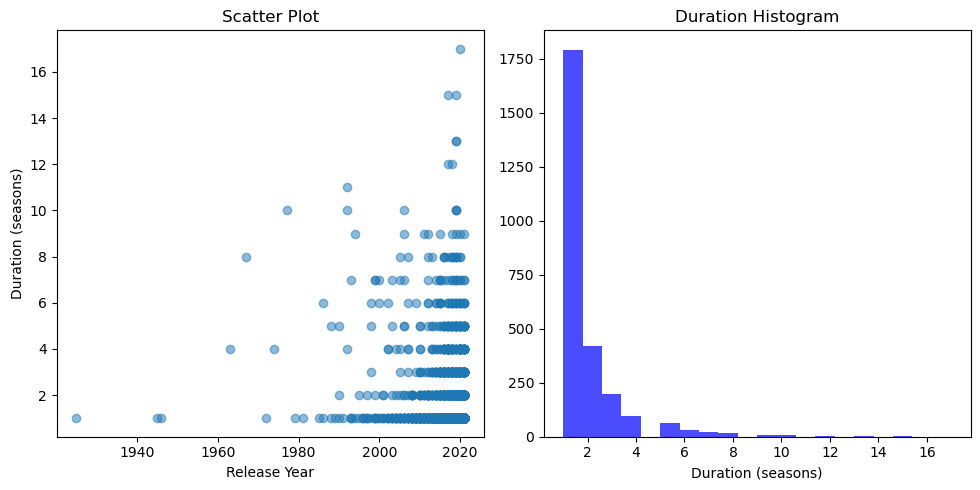

Correlation between Release Year and Duration:
              release_year  duration
release_year      1.000000 -0.081586
duration         -0.081586  1.000000


In [47]:
# 산점도 + 히스토그램을 통한 시각화

selected_data = tv_shows_df[['release_year', 'duration']]
selected_data['duration'] = selected_data['duration'].str.extract('(\d+)').astype(float)

correlation = selected_data.corr()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(selected_data['release_year'], selected_data['duration'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Release Year')
plt.ylabel('Duration (seasons)')

plt.subplot(1, 2, 2)
plt.hist(selected_data['duration'], bins=20, color='blue', alpha=0.7)
plt.title('Duration Histogram')
plt.xlabel('Duration (seasons)')

plt.tight_layout()
plt.show()

print("Correlation between Release Year and Duration:")
print(correlation)

개봉 연도와 영화 프로그램 길이의 상관관계는 -0.21로 약한 음의 상관관계를 가진다.

개봉 연도와 티비 쇼 프로그램 길이의 상관관계는 0에 매우 가까운 -0.082로 상관관계가 없다고 볼 수 있다.

# 결론 및 인사이트

**8-1) 넷플릭스에 프로그램이 추가되는 달 분석**

프로그램이 가장 많이 추가된 달은 7월달로 826개 그 다음은 12월달로 812개가 추가 되었다.

**8-2) type 컬럼의 tv show와 movie 타입 비율 분석**

넷플릭스에 추가된 프로그램은 영화 70%, 티비 쇼 30% 비율이다.

**8-3) 영화, 티비 쇼 타입의 연령대별 등급 분포 분석**

연령대 등급별로 추가된 프로그램의 분포는 kids < older kids < teens < adults 순서이다.
또한, adults 등급 프로그램은 kids 등급 프로그램보다 대략 6배정도 많다.

성인 등급 프로그램 수가 가장 많고 연령대 등급이 높아질수록 프로그램 수가 많아지는 것을 근거로 넷플릭스는 어린이보다 성인 타깃에 집중하고 있는 것을 알 수 있다.

**8-4) 컨텐츠 추가 연도 분석**

본격적으로 넷플릭스에 컨텐츠가 추가된 연도는 2015년이다.
2015년부터 2019년까지 전체적인 컨텐츠가 빠르게 추가된 것을 확인 가능하고, 티비 컨텐츠는 영화 컨텐츠와 비교했을 때 상대적으로 낮은 상승폭을 보인다.
하지만, 2019년을 기점으로 상승 그래프는 하락세로 변화했으며
2019년에 발생한 사건을 회상하면, 코로나 바이러스 유행을 떠올릴 수 있다.

넷플릭스에 추가되는 프로그램의 수와 코로나 바이러스의 상관관계가 있다고 가정한다면, 코로나 바이러스가 미디어 산업에 악영향을 끼쳤다고 볼 수 있을 것이다.

따라서, 넷플릭스 프로그램 수의 변화는 사회적 문제에 영향을 받는 경우가 있다고 말할 수 있을 것이다.

**8-5) 영화 프로그램 상영 시간 분석**

넷플릭스에 추가된 영화의 길이는 90~110분 사이에 가장 많이 분포한다.

**8-6) 장르와 프로그램 길이 분석**

넷플릭스에 추가된 영화 장르 중 드라마는 1위, 다큐멘터리 2위, 스탠드-업 코미디가 3위이다.

넷플릭스에 추가된 드라마 중1위는 kids가 1위, 드라마가 2위, 범죄 컨텐츠가 3위이다.

**8-7) 국가별 프로그램 길이 분석**

**8-8) 국가별 인기 장르 분석**
미국을 제외한 상위 7국가들은 대부분 international movies 장르 비율이 높게 나타난다.

마찬가지로, 티비 타입도 international tv show비율이 높은 것을 확인 가능하다.

**8-9) 넷플릭스 제작 국가 분석**

가장 많은 프로그램을 제작한 국가는 미국으로 2위인 인도와 3배 정도의 차이가 있다.

상위 10개 국가를 대륙별로 나눠보면 북아메리카는 2개 국가(미국, 캐나다), 아시아는 4개 국가(인도, 파키스탄, 일본, 한국), 유럽 3개 국가(영국, 프랑스, 스페인), not given(국가 지정 x)1개로 구성된다.
반대로 상위 10개 국가에 없는 대륙은 아프리카, 오세아니아, 남아메리카인 것을 확인할 수 있다.

**8-10) director 분석**

**8-11) 개봉 연도와 프로그램 길이의 상관관계**

개봉 연도와 영화 프로그램 길이의 상관관계는 -0.21로 약한 음의 상관관계를 가진다.

개봉 연도와 티비 쇼 프로그램 길이의 상관관계는 0에 매우 가까운 -0.082로 상관관계가 없다고 볼 수 있다.